In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# se importa todas las librerias necesarias

In [2]:
# especificamos la ruta y leemos el archivo csv como dataframe
path='../data/vgchartz-2024.csv'
df = pd.read_csv(filepath_or_buffer=path, sep=',', header=0)
# verificamos que se haya cargado correctamente
df.shape

(64016, 14)

In [3]:
# consultamos el contenido de las primeras 5 filas
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [4]:
# mostramos una estadistica descriptiva del dataframe
df.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


### Limpieza de datos con Python:
* Detección y eliminación de valores duplicados: Asegúrate de que cada registro en el dataset sea único.
* Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

In [5]:
# verificacion de valores duplicados
df[df.duplicated(keep=False)]

'''
 fuentes consultadas
 https://es.stackoverflow.com/questions/140170/c%C3%B3mo-puedo-saber-cu%C3%A1les-son-las-filas-duplicadas-con-pandas
 https://www.codeauni.com/comunidad/blog/331/
 
 '''

'\n fguentes consultadas\n https://es.stackoverflow.com/questions/140170/c%C3%B3mo-puedo-saber-cu%C3%A1les-son-las-filas-duplicadas-con-pandas\n https://www.codeauni.com/comunidad/blog/331/\n \n '

In [6]:
# verifico que los tipos de datos por columnas
df.dtypes

img              object
title            object
console          object
genre            object
publisher        object
developer        object
critic_score    float64
total_sales     float64
na_sales        float64
jp_sales        float64
pal_sales       float64
other_sales     float64
release_date     object
last_update      object
dtype: object

### Consistencia en valores categóricos: 
Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Action’, ‘action’, ‘ACTION’).


In [7]:
# comprobamos los valores unicos por catergia
df['genre'].unique()

array(['Action', 'Shooter', 'Action-Adventure', 'Sports', 'Role-Playing',
       'Simulation', 'Racing', 'Music', 'Misc', 'Fighting', 'Platform',
       'Adventure', 'Strategy', 'Puzzle', 'MMO', 'Sandbox', 'Party',
       'Education', 'Board Game', 'Visual Novel'], dtype=object)

### Manejo de valores faltantes: 
Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.


In [8]:
# elimino todas las filas que contengan valores nulos en las columnas relevantes
df = df.dropna(subset=['developer', 'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales'])
df

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
5,/games/boxart/full_call-of-duty-modern-warfare...,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,4.29,1.33,2011-11-08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13056,/games/boxart/full_8302141AmericaFrontccc.jpg,Virtua Striker 2002,GC,Sports,Sega,Amusement Vision,6.6,0.05,0.01,0.03,0.00,0.00,2002-05-20,NaN
13198,/games/boxart/full_5198003AmericaFrontccc.jpg,GrimGrimoire,PS2,Strategy,NIS America,Vanillaware,7.7,0.05,0.01,0.03,0.01,0.00,2007-06-26,2019-01-10
13466,/games/boxart/5726746ccc.jpg,Metal Gear Solid: Digital Graphic Novel,PSP,Misc,Konami,Kojima Productions,7.6,0.04,0.02,0.02,0.00,0.00,2006-06-13,NaN
14151,/games/boxart/9737139ccc.jpg,Gotcha Force,GC,Shooter,Capcom,Capcom,5.8,0.03,0.01,0.01,0.00,0.00,2003-12-03,NaN


In [9]:
# realizo  los calculos para generar una estadistica de valores nulos
columnas_sna = df.shape[0]-df.isnull().sum(axis=0) # determinamos la cantidad de columnas totales memos las columnas con valores nulos por fila
columnas_na=df.isnull().sum(axis=0) # determinamos la suma de todas las columnas con valores nulos
porcentaje_na = round(100*(df.isnull().sum(axis=0) / df.shape[0]),2) # calculamos el porcentaje de valores nulos por columna
dicionario = {'Datos sin NaN':columnas_sna,'NaN en Q':columnas_na,'NaN en %':porcentaje_na} # creamos un diccionario con los datos calculados
na = pd.DataFrame(data=dicionario) # convertimos el diccionario en dataframe
na.sort_values(by='NaN en %', ascending=False) # ordenamos los datos de forma descentende por 'NaN en %'
# solo qued la columna last_update con valores nulos, lo cual no es relevante para el analisis de los datos, queda sin alteraciones

,Datos sin NaN,NaN en Q,NaN en %
last_update,282,928,76.69
img,1210,0,0.00
title,1210,0,0.00
console,1210,0,0.00
genre,1210,0,0.00
publisher,1210,0,0.00
developer,1210,0,0.00
critic_score,1210,0,0.00
total_sales,1210,0,0.00
na_sales,1210,0,0.00


In [10]:
# actualizo el total de ventas para los que tienen valores totales nulos
df.loc[df.total_sales.isnull(),'total_sales'] = df.loc[df.total_sales.isnull(),'na_sales'] + df.loc[df.total_sales.isnull(),'jp_sales'] + df.loc[df.total_sales.isnull(),'pal_sales']+df.loc[df.total_sales.isnull(),'other_sales']
# se toma los valores de ventas de cada columna (na_sales,jp_sales,pal_sales,other_sales)
df

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
5,/games/boxart/full_call-of-duty-modern-warfare...,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,4.29,1.33,2011-11-08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13056,/games/boxart/full_8302141AmericaFrontccc.jpg,Virtua Striker 2002,GC,Sports,Sega,Amusement Vision,6.6,0.05,0.01,0.03,0.00,0.00,2002-05-20,NaN
13198,/games/boxart/full_5198003AmericaFrontccc.jpg,GrimGrimoire,PS2,Strategy,NIS America,Vanillaware,7.7,0.05,0.01,0.03,0.01,0.00,2007-06-26,2019-01-10
13466,/games/boxart/5726746ccc.jpg,Metal Gear Solid: Digital Graphic Novel,PSP,Misc,Konami,Kojima Productions,7.6,0.04,0.02,0.02,0.00,0.00,2006-06-13,NaN
14151,/games/boxart/9737139ccc.jpg,Gotcha Force,GC,Shooter,Capcom,Capcom,5.8,0.03,0.01,0.01,0.00,0.00,2003-12-03,NaN


### Detección de datos anómalos: 
Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un videojuego con ventas negativas).


In [11]:
# verifico si hay valores negativos en las ventas
# creo la condicion para veriicar los valores negativos
condicion = (df['total_sales'] < 0) | (df['jp_sales'] < 0) | (df['na_sales'] < 0) | (df['pal_sales'] < 0) | (df['other_sales'] < 0)
#  consulto las filas del dataframe que cumplan la condición
df.loc[condicion,:]

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update


# Exploración de datos con Python:



## Visualizaciones exploratorias univariadas: 
* Crea dos tipos diferentes de visualizaciones univariadas. 
* Cada visualización debe incluir una breve interpretación dentro del archivo de código.

In [12]:
# genero un a funcion para obtener una agrupación por año de operacion
def agrupar_datos(anho=2018):
    df['release_date'] = pd.to_datetime(df['release_date']) # Convertir la columna 'release_date' a formato datetime
    df['month_year'] = df['release_date'].dt.to_period('M') # Crear una columna para el mes y el año
    df_periodo = df[df['release_date'].dt.year == anho] # Filtrar los datos por un año específico

    # Agrupar por mes y año, y sumar las ventas
    df_agrupado = df_periodo.groupby('month_year')[['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales', 'critic_score']].sum().reset_index()

    return df_agrupado.sort_values(by='month_year', ascending=True) # nos aseguramos que ordende de forma ascendente por mes


'''
    Fuentes de consulta: 
        https://codingdojolatam.la/cursos/data-science-fundamentals-mitic-a-septiembre-2024/leccion/pandas-para-ciencia-de-datos-ii-agrupacion-de-datos-y-metodos-de-agregacion-4/
        copilot, para el filtrado por un año especifico para que el grafico sea màs comprensible        
'''

'\n    Fuentes de consulta: \n        https://codingdojolatam.la/cursos/data-science-fundamentals-mitic-a-septiembre-2024/leccion/pandas-para-ciencia-de-datos-ii-agrupacion-de-datos-y-metodos-de-agregacion-4/\n        copilot, para el filtrado por un año especifico para que el grafico sea màs comprensible        \n'

In [13]:
# comprbuebo que la funcion este correcta
agrupar_datos(2018)

,month_year,total_sales,na_sales,jp_sales,pal_sales,other_sales,critic_score
0,2018-01,0.33,0.07,0.20,0.05,0.01,6.0
1,2018-02,1.63,0.62,0.18,0.62,0.21,25.4
2,2018-03,6.35,2.32,0.56,2.55,0.92,54.0
3,2018-04,0.36,0.18,0.08,0.08,0.03,7.0
4,2018-05,0.65,0.33,0.08,0.19,0.05,16.5
5,2018-06,4.70,1.79,0.67,1.81,0.41,52.6
6,2018-07,0.19,0.06,0.08,0.04,0.01,8.5
7,2018-08,1.82,0.60,0.42,0.65,0.16,33.1
8,2018-09,3.55,0.83,1.59,0.93,0.21,38.5
9,2018-10,20.47,7.76,0.46,9.17,3.08,59.7


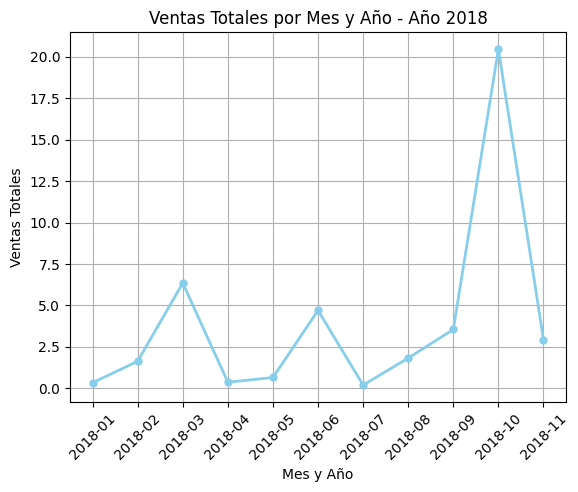

In [14]:
# FUENTE CONSULTADA: https://medium.com/@Davidlb/an%C3%A1lisis-y-pron%C3%B3stico-de-ventas-utilizando-python-1b1f434e869

# Creo el primer gráfico tomando como dato el total de ventas para un año determinado
anho=2018  # especificamos el año para la consulta de datos del df
datos_agrupados = agrupar_datos(anho) # invocamos a la funcion para crear un df a partir del resultado
# generamos el grafico desde el nuevo df con los valores necesarios 
plt.plot(datos_agrupados['month_year'].astype(str), datos_agrupados['total_sales'], marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=5)
plt.title('Ventas Totales por Mes y Año - Año '+str(anho)) # titulo para el gráfico
plt.xlabel('Mes y Año') # etiqueta para el eje x
plt.ylabel('Ventas Totales') #etiquera par el eje Y
plt.xticks(rotation=45) # establecemos la rotacion npara los titulos de serie del eje x
plt.grid(True) # indicamos que se debe mostrar la cuadricula par mejor interpretación 
plt.show() # Visualizamos el grafico

# Interpretación: se puede observar que las mayores ventas del año 2018 se realizaron en el de octubre

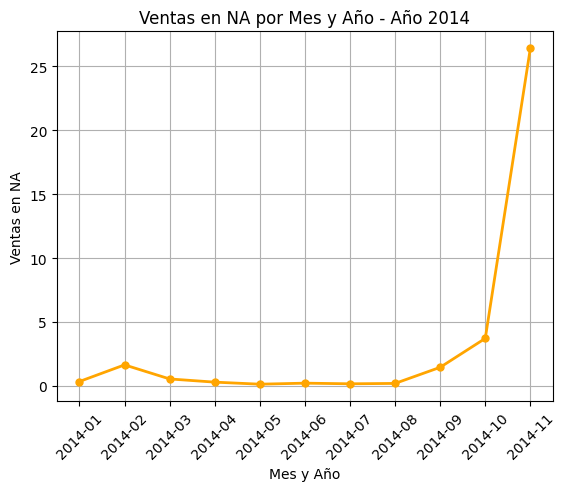

In [15]:
# generamos el grafico para el total de ventas por año para na_sales
anho=2014 # especificamos el año
datos_agrupados = agrupar_datos(anho) # invocamos a la funcion para crear un df a partif del resultado de dicha funcion
# creamos el grafico para las ventas de na
plt.plot(datos_agrupados['month_year'].astype(str), datos_agrupados['na_sales'], marker='o', color='orange', linestyle='-', linewidth=2, markersize=5)

plt.title('Ventas en NA por Mes y Año - Año '+str(anho)) # establecemos el titulo para el grafico
plt.xlabel('Mes y Año') # Designamos titulo para eje x
plt.ylabel('Ventas en NA') # designamos titulo para eje y
plt.xticks(rotation=45) # inclinamos a 45grados los titulos de serie del eje x
plt.grid(True) # especificamos que se debe mostrar cuadricula
plt.show() # mostramos el grafico

# Interpretación: se puede observar que las mayores ventas del año 2014 paren NA se realizaron en el mes de noviembre

## Visualizaciones exploratorias multivariadas: 
* Crea dos tipos diferentes de visualizaciones multivariadas. 
* Cada visualización debe incluir una breve interpretación dentro del archivo de código.

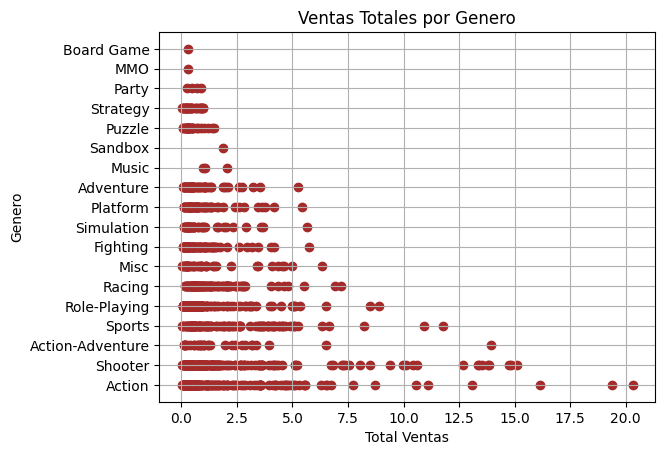

In [56]:

# generamos el gráfico con el total de las ventas por genero
plt.scatter(df['total_sales'], df['genre'], color='brown') 
plt.title('Ventas Totales por Genero') # titulo del grafico
plt.xlabel('Total Ventas') # titulo deñl eje x
plt.ylabel('Genero') # titulo del eje y
plt.grid(True) # especificamos que se debe mostrar cuadricula
plt.show() # mostramos el gráfico
# Interpretación: se visualiza que los productos más vendidos son los del genero 'Action', muy por el contraro  que los del genero 'Broad Game'

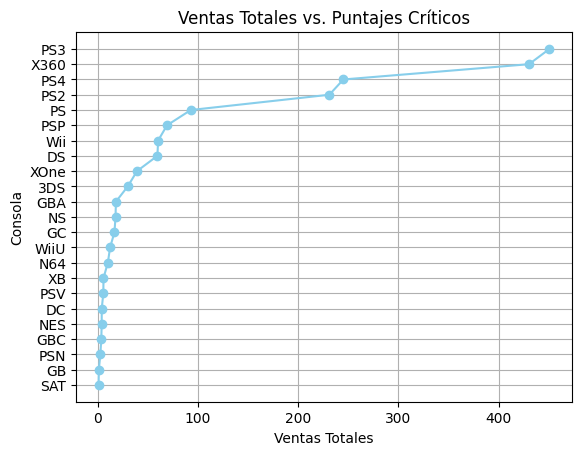

In [49]:
# creamos un df agrupando los datos por total_sales 
df_agrupado = df.groupby('console')['total_sales'].sum().reset_index()
# ordenamos el df por total de ventas de forma ascendente
ordenado = df_agrupado.sort_values('total_sales', ascending=True)

# generamos el grafico  por total de ventas y consola
plt.plot(ordenado['total_sales'], ordenado['console'], marker='o', color='skyblue') #indicamos que el marcador es un circulo en color azul claro
plt.title('Ventas Totales vs. Puntajes Críticos') # titulo del grafico
plt.xlabel('Ventas Totales') # titulo o etiqueta de la columna x
plt.ylabel('Consola') #titulo de la columna y

plt.grid(True) # especificamos que se debe mostrar la cuadricula
plt.show()  # mostramos el grafico

# Interpretacion: se visualiza que los productos mas vendidos son los de consola 'PS3' y 'X360'
# En segundo orden se encuentran 'PS4' y 'PS2'.

### Análisis adicional:



## Estadísticas descriptivas: 
* Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.

In [75]:
# estadistica descriptiva
df.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,mes
count,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210,1210.000000
mean,7.537769,1.499777,0.690438,0.106512,0.524727,0.178074,2009-05-21 11:32:37.685950464,7.228099
min,3.000000,0.020000,0.010000,0.000000,0.000000,0.000000,1989-06-01 00:00:00,1.000000
25%,6.800000,0.350000,0.140000,0.020000,0.050000,0.020000,2007-03-20 00:00:00,4.000000
50%,7.700000,0.710000,0.290000,0.050000,0.200000,0.060000,2009-10-06 00:00:00,8.000000
75%,8.400000,1.577500,0.727500,0.127500,0.530000,0.180000,2011-10-11 00:00:00,10.000000
max,10.000000,20.320000,9.760000,1.870000,9.850000,3.120000,2018-11-16 00:00:00,12.000000
std,1.200153,2.228479,1.097869,0.164748,0.953987,0.322764,NaN,3.430396


## Identificación de tendencias: 
* Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.


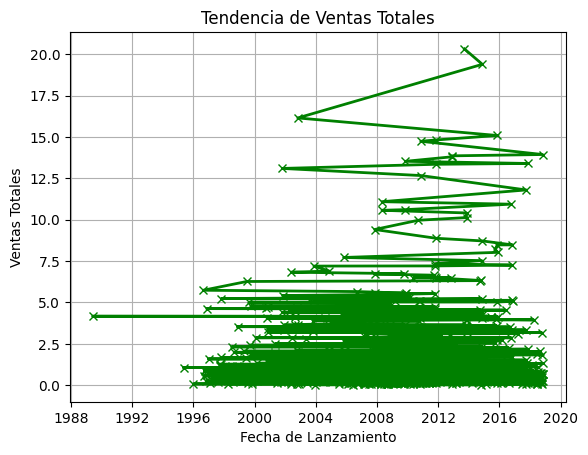

In [76]:

# Crear el gráfico de líneas para visualizar la tendencia de 'total_sales' por fecha de lanzamiento
plt.plot(df['release_date'], df['total_sales'], color='green', marker='x', linewidth=2)
plt.title('Tendencia de Ventas Totales') # titulo del grafico
plt.xlabel('Fecha de Lanzamiento') # titulo para el eje x
plt.ylabel('Ventas Totales') # titulo para el eje y

plt.grid(True) # mostramos la cuadricula en el gráfico
plt.show() # mostramos el gráfico

# Interpretación: se observa que las mayores ventas se producen entre 2012 y 2016, por lo que se presume que las ventas podrian ir en aumento

## Análisis de correlación: 
* Identifica y analiza las correlaciones más fuertes entre las variables del dataset.

In [79]:
# Generamos la serie de valores numericos para realizar el calculo de correlacion
columnas = ['total_sales','jp_sales','na_sales','pal_sales','other_sales']
# Calcular la correlación para las columnas seleccionadas
correlacion = df[columnas].corr()
# Mostramos la correlación
print(correlacion)


             total_sales  jp_sales  na_sales  pal_sales  other_sales
total_sales     1.000000  0.264000  0.916239   0.928543     0.909282
jp_sales        0.264000  1.000000  0.115750   0.225273     0.253886
na_sales        0.916239  0.115750  1.000000   0.719905     0.738655
pal_sales       0.928543  0.225273  0.719905   1.000000     0.891946
other_sales     0.909282  0.253886  0.738655   0.891946     1.000000


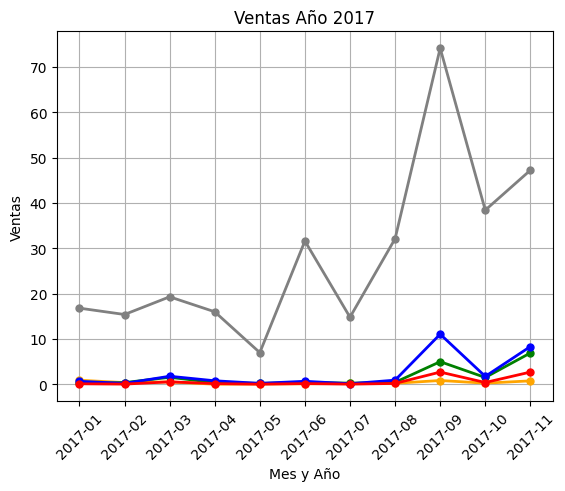

In [80]:
anho=2017 # año para tener en cuenta para anlizar los datos
datos_agrupados = agrupar_datos(anho) # invocamos a la funcion para crear un df a partif del resultado
# generamos el grafico y agregamos los datos por grupo 
plt.plot(datos_agrupados['month_year'].astype(str), datos_agrupados['jp_sales'], marker='o', color='orange', linestyle='-', linewidth=2, markersize=5)
plt.plot(datos_agrupados['month_year'].astype(str), datos_agrupados['na_sales'], marker='o', color='green', linestyle='-', linewidth=2, markersize=5)
plt.plot(datos_agrupados['month_year'].astype(str), datos_agrupados['pal_sales'], marker='o', color='blue', linestyle='-', linewidth=2, markersize=5)
plt.plot(datos_agrupados['month_year'].astype(str), datos_agrupados['other_sales'], marker='o', color='red', linestyle='-', linewidth=2, markersize=5)
plt.plot(datos_agrupados['month_year'].astype(str), datos_agrupados['critic_score'], marker='o', color='gray', linestyle='-', linewidth=2, markersize=5)

plt.title('Ventas Año '+str(anho)) # titulo para el grafico
plt.xlabel('Mes y Año') # titulo para el eje x
plt.ylabel('Ventas') # titulo para el eje y
plt.xticks(rotation=45) # rotamos 23 grados los titulos del eje x
plt.grid(True) # especificamos que se debe mostrar la grilla en el gráfico
plt.show() # mostramos el grafico

# Interpretación: Todas las ventas estan tienen un acorrelacion entre ellas, no asi entre las venbtas y la puntuación crítica

## Predicción de ventas: 
* Utiliza un modelo de regresión simple para predecir las ventas futuras basadas en los datos disponibles.

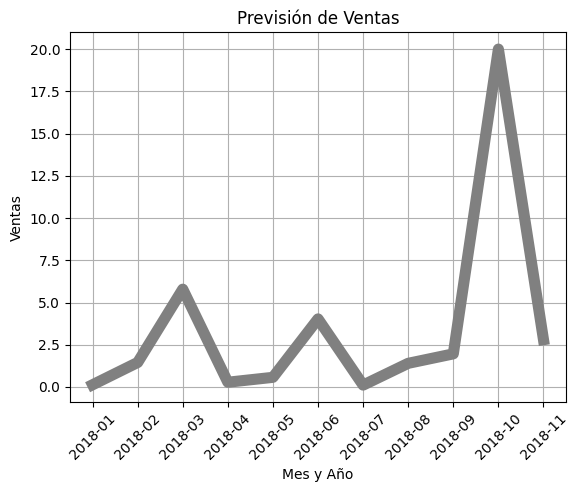

In [111]:
anho=2018 # año para tener en cuenta para anlizar los datos
datos_agrupados = agrupar_datos(anho) # invocamos a la funcion para crear un df a partif del resultado
datos_agrupados['variaciones'] = datos_agrupados['total_sales'] - datos_agrupados['jp_sales'] # 

# generamos el grafico
plt.plot(datos_agrupados['month_year'].astype(str), datos_agrupados['variaciones'], color='gray', linestyle='-', linewidth=8)

plt.title('Previsión de Ventas') # titulo para el grafico
plt.xlabel('Mes y Año') # titulo para el eje x
plt.ylabel('Ventas') # titulo para el eje y
plt.xticks(rotation=45) # rotamos 23 grados los titulos del eje x
plt.grid(True) # especificamos que se debe mostrar la grilla en el gráfico
plt.show() # mostramos el grafico

# Las mayores ventas se realizan en las etapas los meses finales del año